Subquestion 3: How has the shift to hybrid working influenced peak-hour vs. off-peak demand for public transport and how do these effects differ across weekdays?

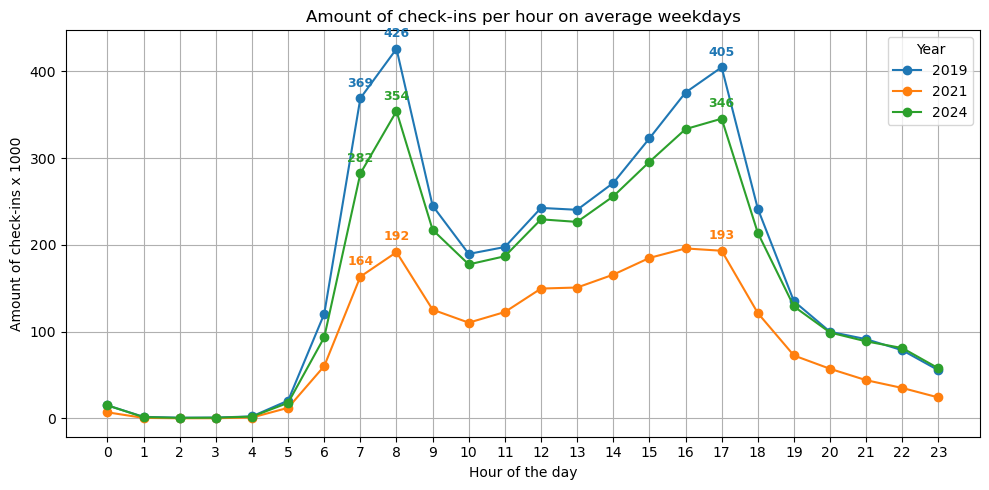

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data import
df_2019 = pd.read_csv('/Users/bentedegen/Desktop/tilprogramming/groep24/Subquestion 3/q3_2019_workingdays_allmonths.csv', sep=';')
df_2021 = pd.read_csv('/Users/bentedegen/Desktop/tilprogramming/groep24/Subquestion 3/q3_2021_workingdays_allmonths.csv', sep=';')
df_2024 = pd.read_csv('/Users/bentedegen/Desktop/tilprogramming/groep24/Subquestion 3/q3_2024_workingdays_allmonths.csv', sep=';')

# Cleaning columns and values
for df in [df_2019, df_2021, df_2024]:
    df.columns = ['hour', 'check-ins']
    df['hour'] = pd.to_numeric(df['hour'], errors='coerce').astype(int)
    df['check-ins'] = pd.to_numeric(df['check-ins'].astype(str).str.replace(',', '.', regex=False), errors='coerce')

# Group per hour together 
hourly_2019 = df_2019.groupby('hour')['check-ins'].sum().reset_index()
hourly_2021 = df_2021.groupby('hour')['check-ins'].sum().reset_index()
hourly_2024 = df_2024.groupby('hour')['check-ins'].sum().reset_index()

# Plot  values
plt.figure(figsize=(10,5))
plt.plot(hourly_2019['hour'], hourly_2019['check-ins'], marker='o', label='2019')
plt.plot(hourly_2021['hour'], hourly_2021['check-ins'], marker='o', label='2021')
plt.plot(hourly_2024['hour'], hourly_2024['check-ins'], marker='o', label='2024')

plt.title("Amount of check-ins per hour on average weekdays")
plt.xlabel("Hour of the day")
plt.ylabel("Amount of check-ins x 1000")
plt.xticks(range(0,24))
plt.grid(True)
plt.legend(title="Year")

# Labels on peak hours
peak_hours = [7, 8, 17]

def label_peaks(hourly, color):
    for h in peak_hours:
        val = hourly.loc[hourly['hour'] == h, 'check-ins']
        if not val.empty:
            y = val.values[0]
            plt.text(h, y + 10, f"{y:.0f}", color=color, ha='center', va='bottom', fontsize=9, fontweight='bold')

# Lbels per jaar
label_peaks(hourly_2019, 'tab:blue')
label_peaks(hourly_2021, 'tab:orange')
label_peaks(hourly_2024, 'tab:green')

plt.tight_layout()
plt.show()


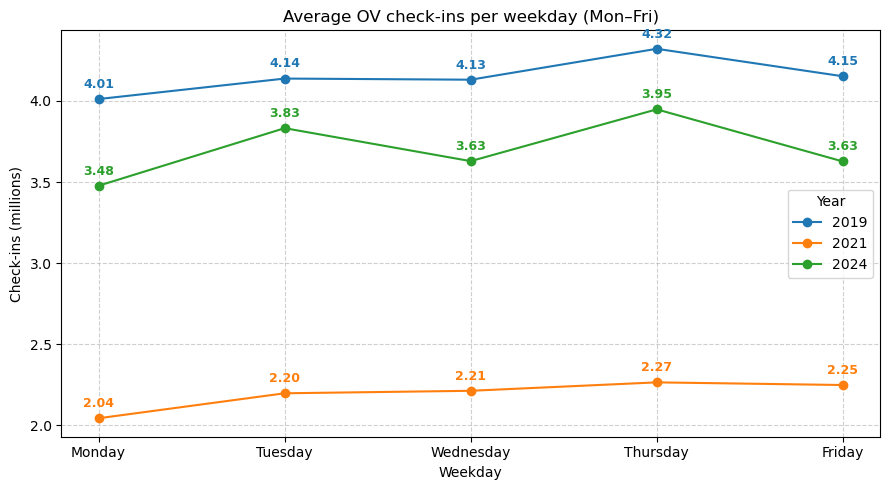

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_2019 = r"/Users/bentedegen/Desktop/tilprogramming/groep24/Subquestion 3/2019 check-ins ov per day.csv"
file_2021 = r"/Users/bentedegen/Desktop/tilprogramming/groep24/Subquestion 3/2021 check-ins ov per day.csv"
file_2024 = r"/Users/bentedegen/Desktop/tilprogramming/groep24/Subquestion 3/2024 check-ins ov per day.csv"

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month_no = {m:i+1 for i,m in enumerate(months)}
workdays = ['Monday','Tuesday','Wednesday','Thursday','Friday']

def load_year(csv_path, year):
    df = pd.read_csv(csv_path, sep=None, engine='python', encoding='utf-8-sig')
    # Numeric check
    for m in months:
        if m in df.columns:
            df[m] = pd.to_numeric(df[m], errors='coerce')
    df['Day'] = pd.to_numeric(df['Day'], errors='coerce')

    # Wide -> long
    long = df.melt(id_vars='Day',
                   value_vars=[c for c in df.columns if c in months],
                   var_name='Month', value_name='checkins').dropna(subset=['checkins'])

    # Add date info
    long['Year'] = year
    long['Month'] = long['Month'].map(month_no)
    long['Date'] = pd.to_datetime(long[['Year','Month','Day']], errors='coerce')
    long['Weekday'] = long['Date'].dt.day_name()

    # Keep Mon–Fri
    return long[long['Weekday'].isin(workdays)][['Year','Weekday','checkins']]

# Load and combine data
d2019 = load_year(file_2019, 2019)
d2021 = load_year(file_2021, 2021)
d2024 = load_year(file_2024, 2024)
all_days = pd.concat([d2019, d2021, d2024], ignore_index=True)

# Average check-ins per weekday per year
avg = (all_days.groupby(['Weekday','Year'])['checkins']
       .mean().unstack('Year').reindex(workdays))

# Plot
plt.figure(figsize=(9,5))
colors = ['tab:blue','tab:orange','tab:green']

for yr, color in zip(avg.columns, colors):
    plt.plot(workdays, avg[yr].values, marker='o', label=str(yr), color=color)

    # Labels on all values
    for i, val in enumerate(avg[yr].values):
        plt.text(i, val + 0.05, f"{val:.2f}", ha='center', va='bottom',
                 fontsize=9, color=color, fontweight='bold')

plt.title("Average OV check-ins per weekday (Mon–Fri)")
plt.xlabel("Weekday")
plt.ylabel("Check-ins (millions)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Year")
plt.tight_layout()
plt.show()
